In [2]:
library(tidyverse)
library(ggpubr)
library(GGally)
library(yaml)
#library(Seurat)
#library(ggvenn)

#read config
config <- read_yaml(file = "../CHARM//config.yaml")

#Common
Raw <- read_table2("../stat/raw.fq.stat",col_names=F) %>% arrange(X1) %>% rowwise() %>% mutate(X2 = X2/4*300/1000000000,X1 = strsplit(X1,split = "/")[[1]][3])
DNA <- read_table2("../stat/dna.fq.stat",col_names=F) %>% arrange(X1) %>% rowwise()%>% mutate(X2 = X2/4*300/1000000000,X1 = strsplit(X1,split = "/")[[1]][3])
RNA <- read_table2("../stat/rna.fq.stat",col_names=F) %>% arrange(X1) %>% rowwise() %>% mutate(X2 = X2/4*300/1000000000,X1 = strsplit(X1,split = "/")[[1]][3])

raw_pairs <- read_table2("../stat/raw.pairs.stat",col_names=F) %>% arrange(X1) %>% rowwise() %>% mutate(X1 = strsplit(X1,split = "/")[[1]][3])
pairs_dedup <- read_table2("../stat/pairs.dedup.stat",col_names=F) %>% arrange(X1) %>% rowwise() %>% mutate(X1 = strsplit(X1,split = "/")[[1]][3])

pairs_c1 <- read_table2("../stat/pairs.c1.stat",col_names=F)%>% arrange(X1) %>%rowwise() %>% mutate(X1 = strsplit(X1,split = "/")[[1]][5]) %>% mutate(X1 = str_replace(X1,".pairs.gz",""))
pairs_c12 <- read_table2("../stat/pairs.c12.stat",col_names=F)%>% arrange(X1) %>%rowwise() %>% mutate(X1 = strsplit(X1,split = "/")[[1]][5]) %>% mutate(X1 = str_replace(X1,".pairs.gz",""))
inter_pairs_c12 <- read_table2(file = "../stat/inter.pairs.c12.stat",col_names = F) %>% arrange(X1) %>%rowwise() %>% mutate(X1 = strsplit(X1,split = "/")[[1]][5]) %>% mutate(X1 = str_replace(X1,".pairs.gz",""))
yperx <- read_table2("../stat/yperx.stat",col_names=F) %>% arrange(X1) %>% rowwise() %>% mutate(X1 = strsplit(X1,split = "/")[[1]][2])
stat <- Raw %>% left_join(DNA,by="X1") %>% left_join(RNA,by="X1") %>% left_join(yperx,by="X1") %>% left_join(raw_pairs,by="X1") %>% left_join(pairs_dedup,by="X1") %>% 
    left_join(pairs_c1,by="X1") %>% left_join(pairs_c12,by="X1") %>% left_join(inter_pairs_c12,by="X1")
RNAres <- read_table2("../result/RNA_Res/counts.gene.total.format.tsv")
featureStat <- cbind(as.data.frame(colSums(RNAres %>% select(-gene))),colSums(RNAres %>% select(-gene) != 0)) %>% rownames_to_column("X1")
RNAresExon <- read_table2("../result/RNA_Res/counts.exon.total.format.tsv")
featureStatExon <- cbind(as.data.frame(colSums(RNAresExon %>% select(-gene))),colSums(RNAresExon %>% select(-gene) != 0))  %>% rownames_to_column("X1")
RNAresGenome1 <- read_table2("../result/RNA_Res/counts.gene.genome1.tsv")
RNAresGenome2 <- read_table2("../result/RNA_Res/counts.gene.genome2.tsv")
featureStatGenome1 <- cbind(as.data.frame(colSums(RNAresGenome1 %>% select(-gene))),colSums(RNAresGenome1 %>% select(-gene) != 0)) %>% rownames_to_column("X1")
featureStatGenome2 <- cbind(as.data.frame(colSums(RNAresGenome2 %>% select(-gene))),colSums(RNAresGenome2 %>% select(-gene) != 0)) %>% rownames_to_column("X1")
stat <- stat %>% left_join(featureStat,by="X1") %>% left_join(featureStatExon,by="X1") %>% left_join(featureStatGenome1,by="X1")  %>% left_join(featureStatGenome2,by="X1")
names(stat) <- c("cellname","Rawreads","DNAreads","RNAreads","yperx","raw_pairs","pairs_dedup","pairs_clean1","pairs_clean2","inter_pairs_clean2",
                 "UMIs_gene","genes_gene","UMIs_exon","genes_exon","UMIs_gene_genome1","genes_gene_genome1","UMIs_gene_genome2","genes_gene_genome2")

if(config$if_structure){
    rmsd <- read_table2("../stat/rmsd.info",col_names = F) %>% rowwise() %>% mutate(X1=str_split(X1,pattern = fixed("/")),cellname = X1[1], res = str_split(X1[3], fixed("."))[[1]][2],TOP3_RMSD = X5) %>% select(cellname,res,TOP3_RMSD) %>% spread(res,TOP3_RMSD) %>% arrange(cellname)
    stat <- stat %>% left_join(rmsd)
}
if(config$if_cuttag){
    CT <- read_table2("../stat/ct.stat",col_names=c("cellname","CTreads")) %>% arrange(cellname)  %>% mutate(CTreads = CTreads/4) %>% select(CTreads)
    CTfrag <- read_table2("../stat/ct.frag.stat",col_names=c("cellname","CTfrags")) %>% arrange(cellname) %>% select(CTfrags)
    stat<-cbind(stat,CT,CTfrag)
}


── Attaching packages ─────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


── Column specification ────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double()
)



── Column specification ────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double()
)



── Column specification ────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_character(),
  X2 = col_double()
)



── Column specification 

ERROR: Error: '../stat/ct.stat' does not exist in current working directory ('/shareb/zliu/project/202108/CHARM_0811/CHARM').


In [1]:
read_table2("../stat/ct.stat",col_names=c("cellname","CTreads"))

ERROR: Error in read_table2("../stat/ct.stat", col_names = c("cellname", "CTreads")): could not find function "read_table2"


In [140]:
plot <- stat %>% mutate(RNAreadsRatio = RNAreads/(RNAreads+DNAreads),
                        pairsPerRead = raw_pairs/DNAreads/1000000000*300,
                        pairsValidRatio = pairs_clean2/raw_pairs,
                        interPairsRatio = inter_pairs_clean2/pairs_clean2) 


In [141]:
plot %>% write_tsv("metadata.tsv")

In [142]:
plot %>%  summary.data.frame() 

   cellname            Rawreads        DNAreads         RNAreads        
 Length:144         Min.   :0.571   Min.   :0.5421   Min.   :0.0000006  
 Class :character   1st Qu.:1.486   1st Qu.:1.3720   1st Qu.:0.0734134  
 Mode  :character   Median :1.927   Median :1.7542   Median :0.1312582  
                    Mean   :1.995   Mean   :1.8174   Mean   :0.1576578  
                    3rd Qu.:2.493   3rd Qu.:2.3049   3rd Qu.:0.2100362  
                    Max.   :4.235   Max.   :3.8707   Max.   :0.5720028  
                                                                        
     yperx            raw_pairs        pairs_dedup      pairs_clean1   
 Min.   :0.000502   Min.   :   3444   Min.   :  2042   Min.   :  1555  
 1st Qu.:0.021828   1st Qu.: 349617   1st Qu.:163273   1st Qu.:161598  
 Median :0.027125   Median : 528458   Median :218106   Median :215371  
 Mean   :0.027583   Mean   : 548462   Mean   :216657   Mean   :214763  
 3rd Qu.:0.032771   3rd Qu.: 659298   3rd Qu.:273358   3

In [146]:
plot %>% dim()
plot %>% filter(`1m`<1)%>% dim()
plot %>% filter(`50k`<1)%>% dim()

[1] 144  26

[1] 50 26

[1] 34 26

In [26]:
plot %>% write_tsv("../analysis/mesc.stat.tsv")

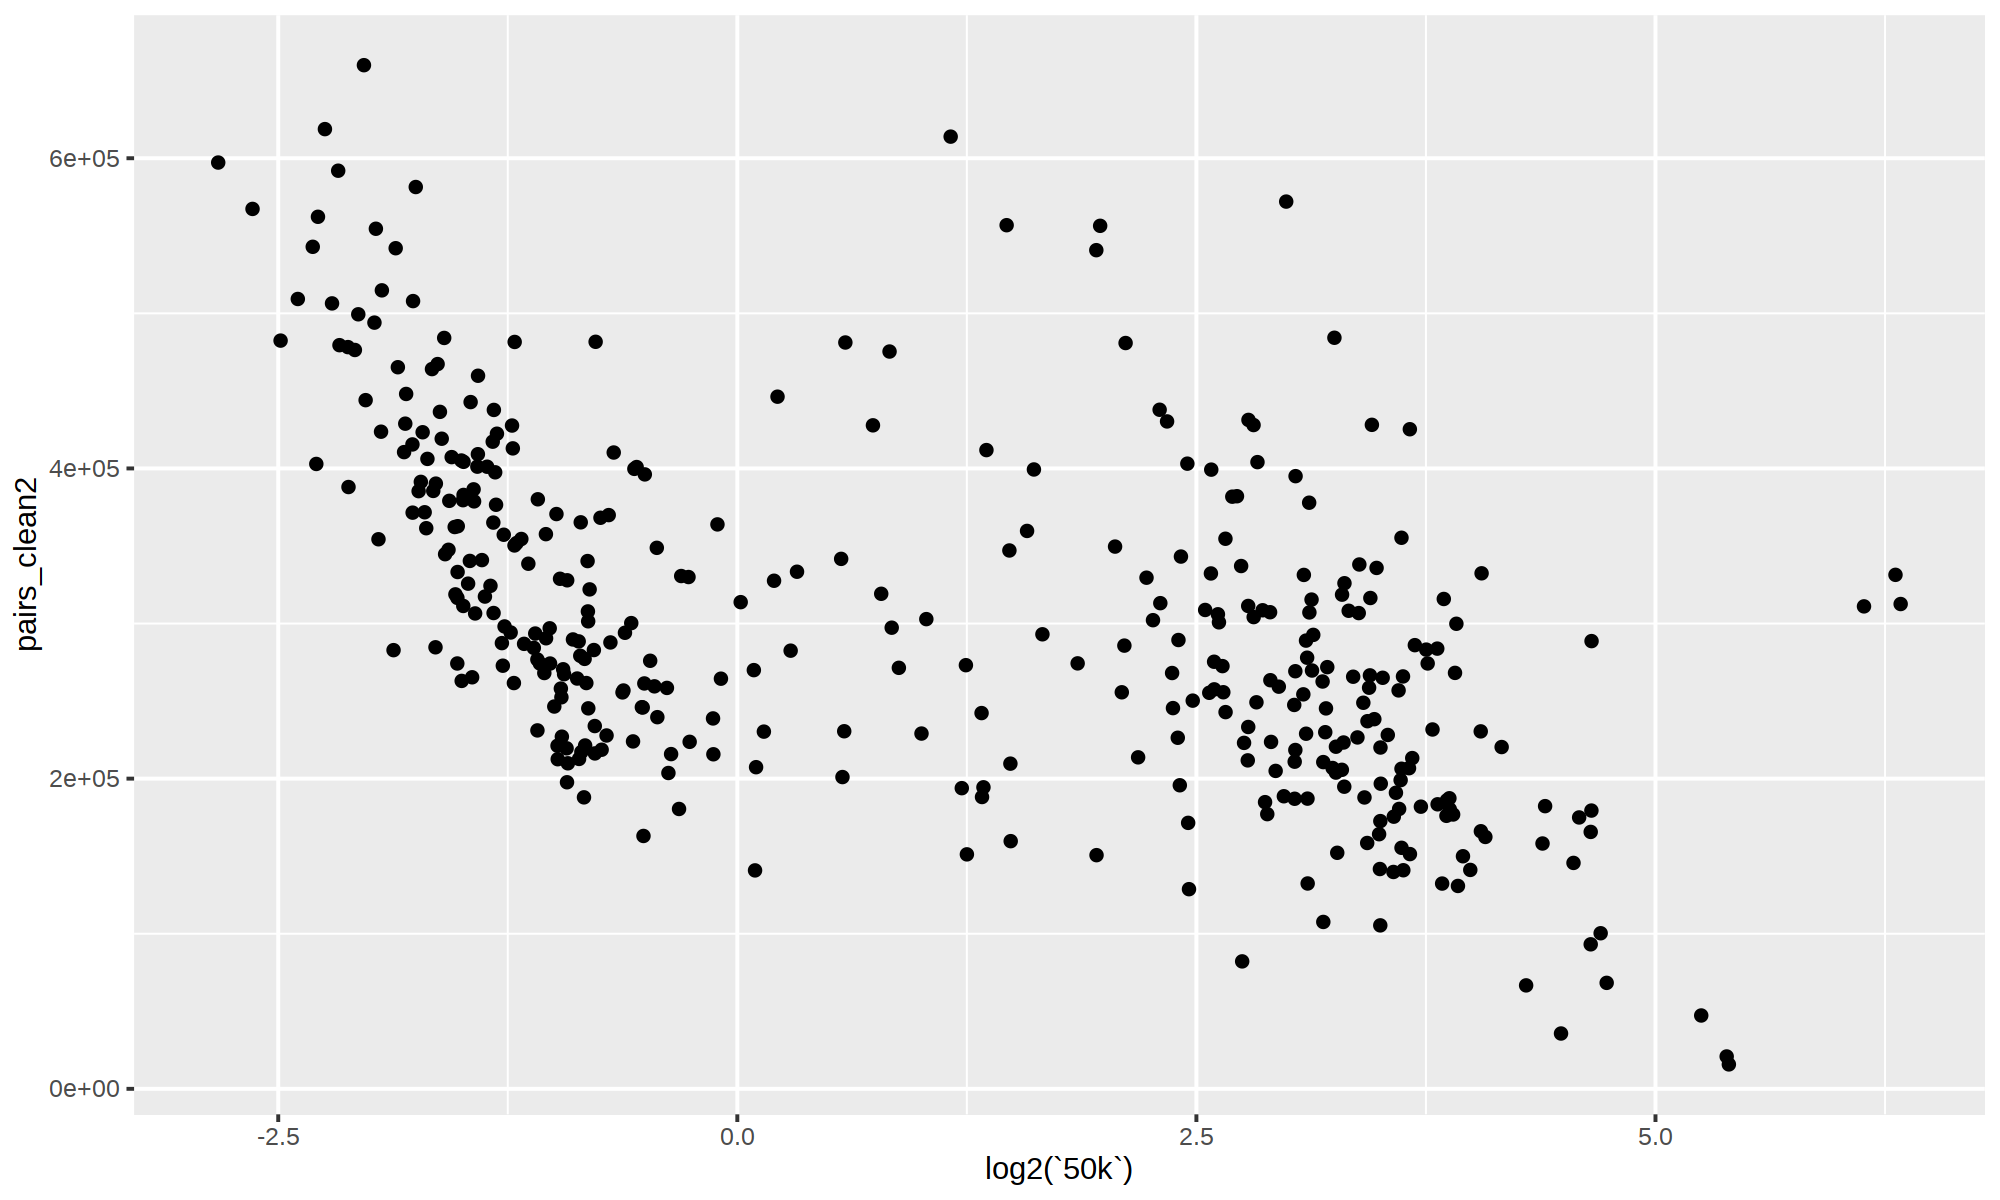

In [88]:
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 200)
plot %>% ggplot() + geom_point(aes(x=log2(`50k`),y=pairs_clean2))

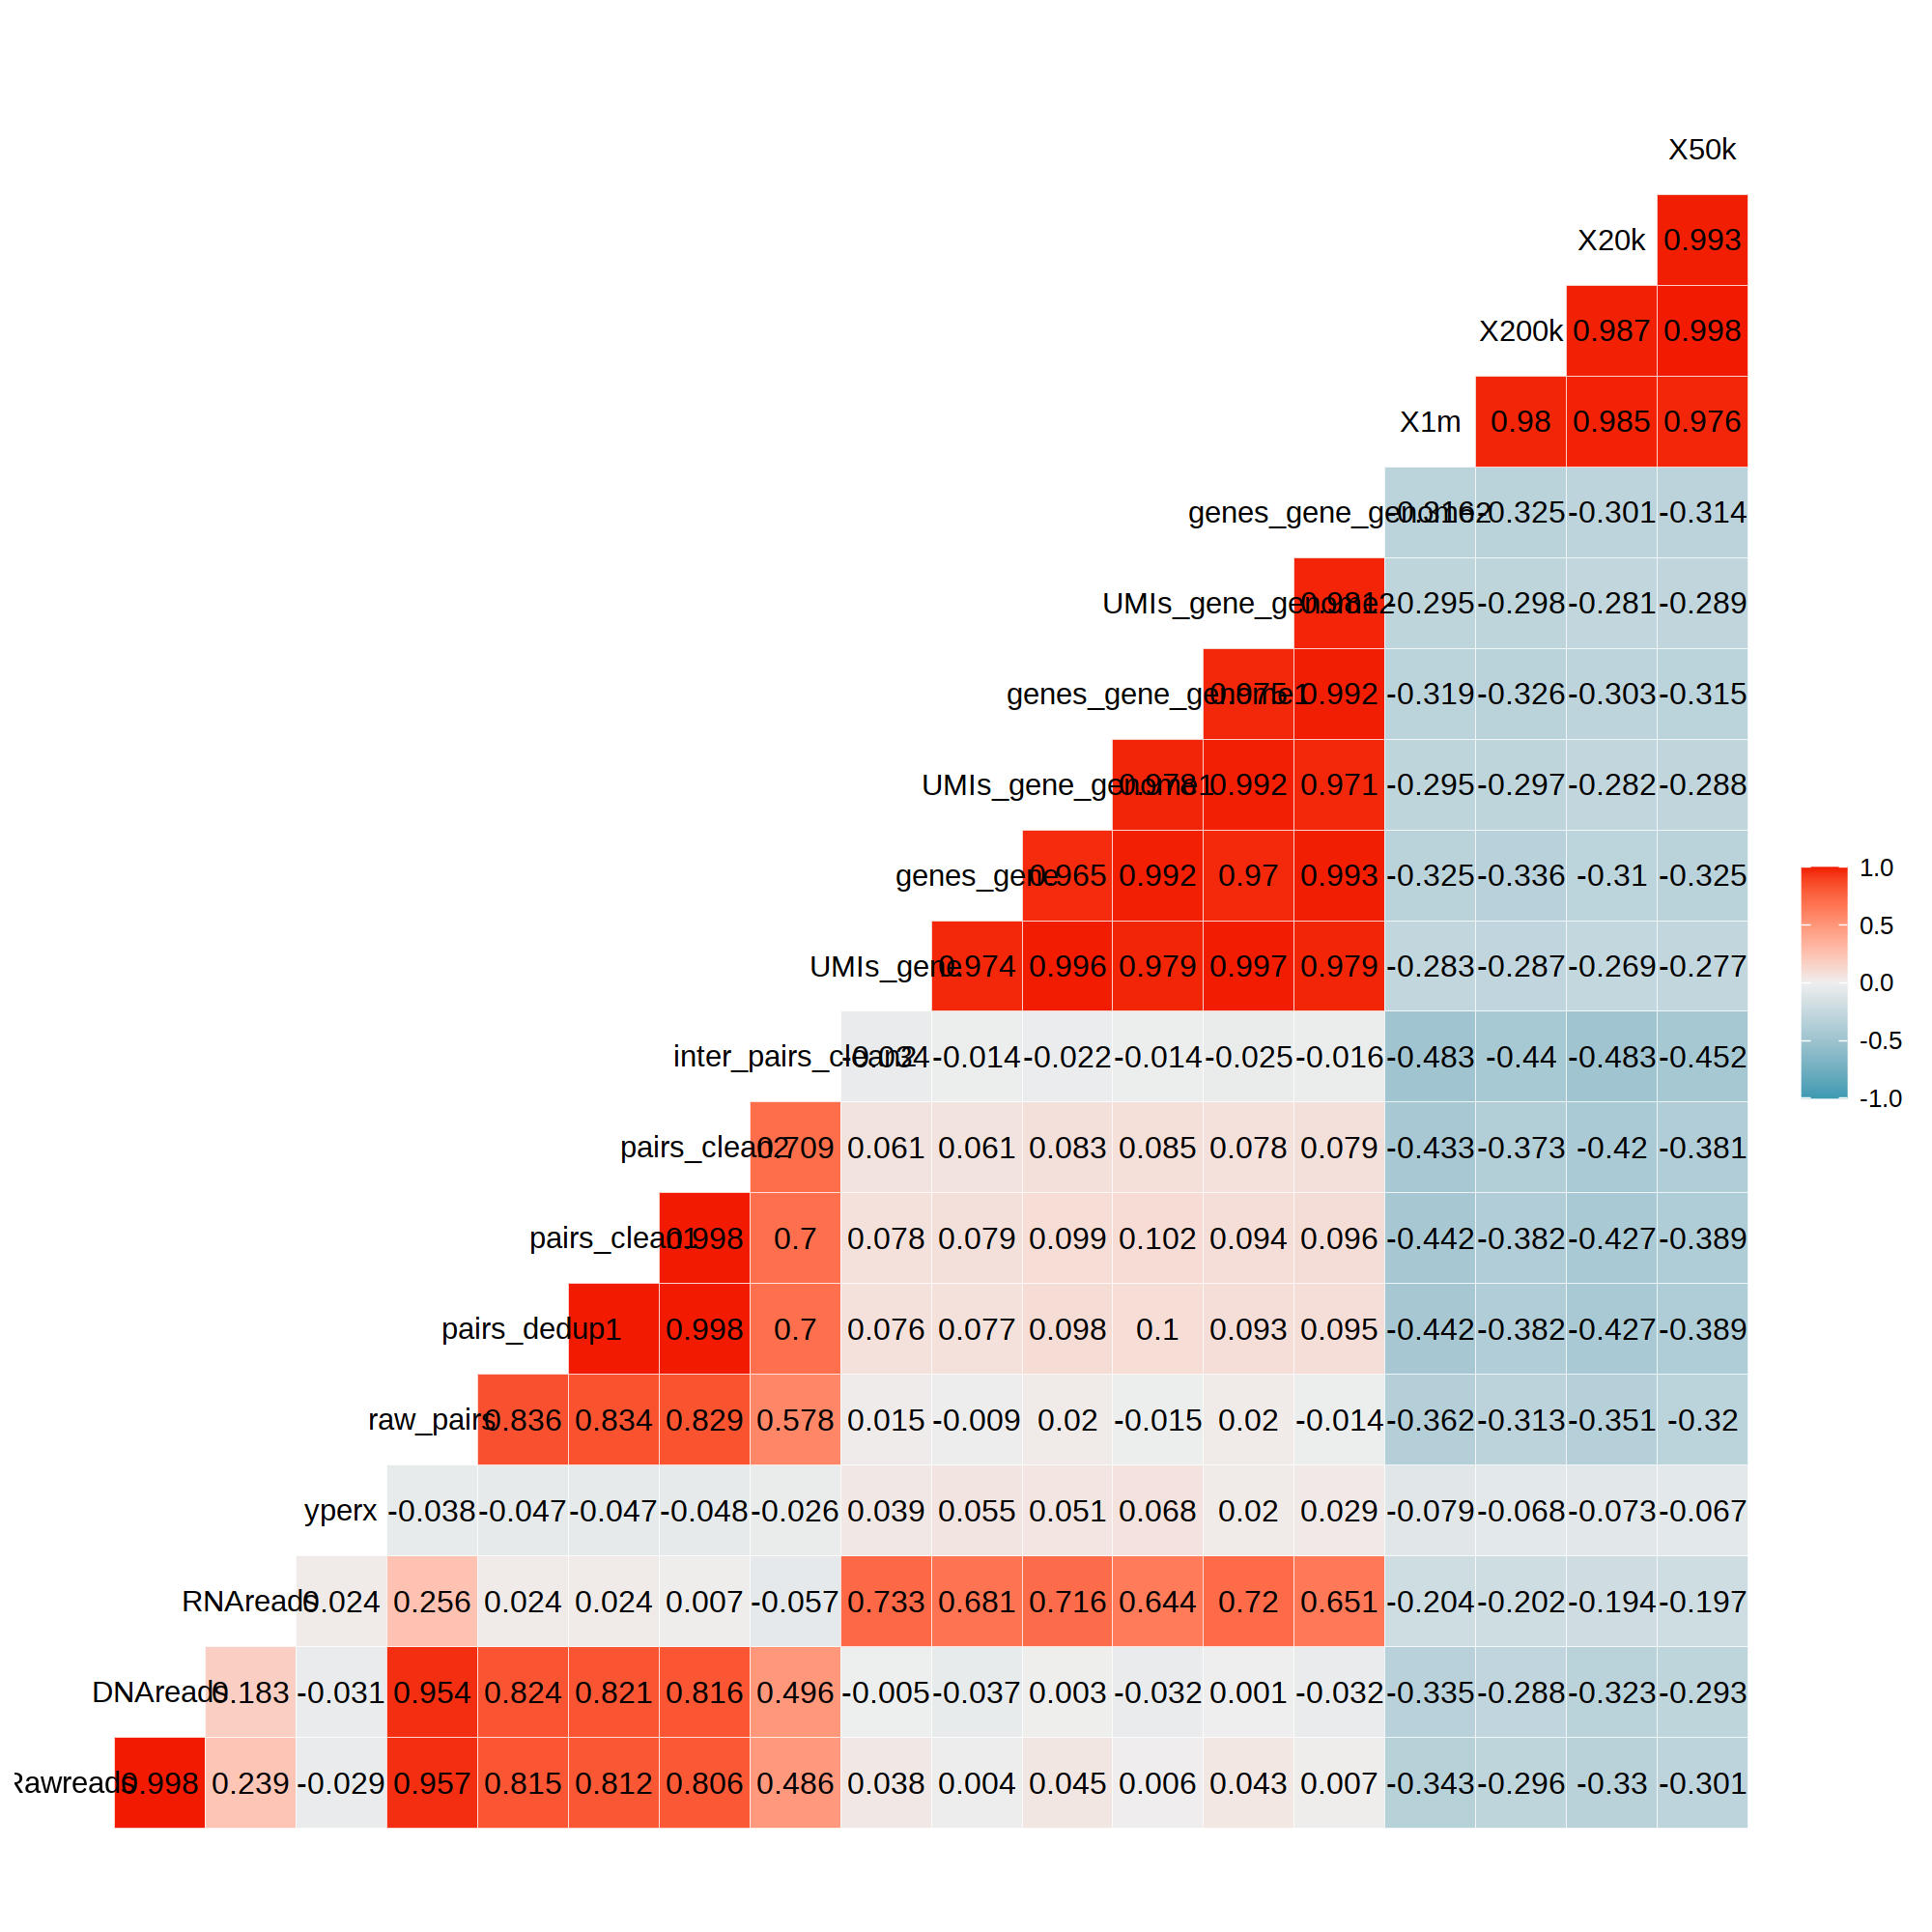

In [89]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 200)
stat%>% ggcorr(method = c("everything","pearson"),label=T,label_round = 3)

Warning message in ggcorr(RNAres, legend.size = 14, method = c("everything", "pearson"), :
“data in column(s) 'gene' are not numeric and were ignored”


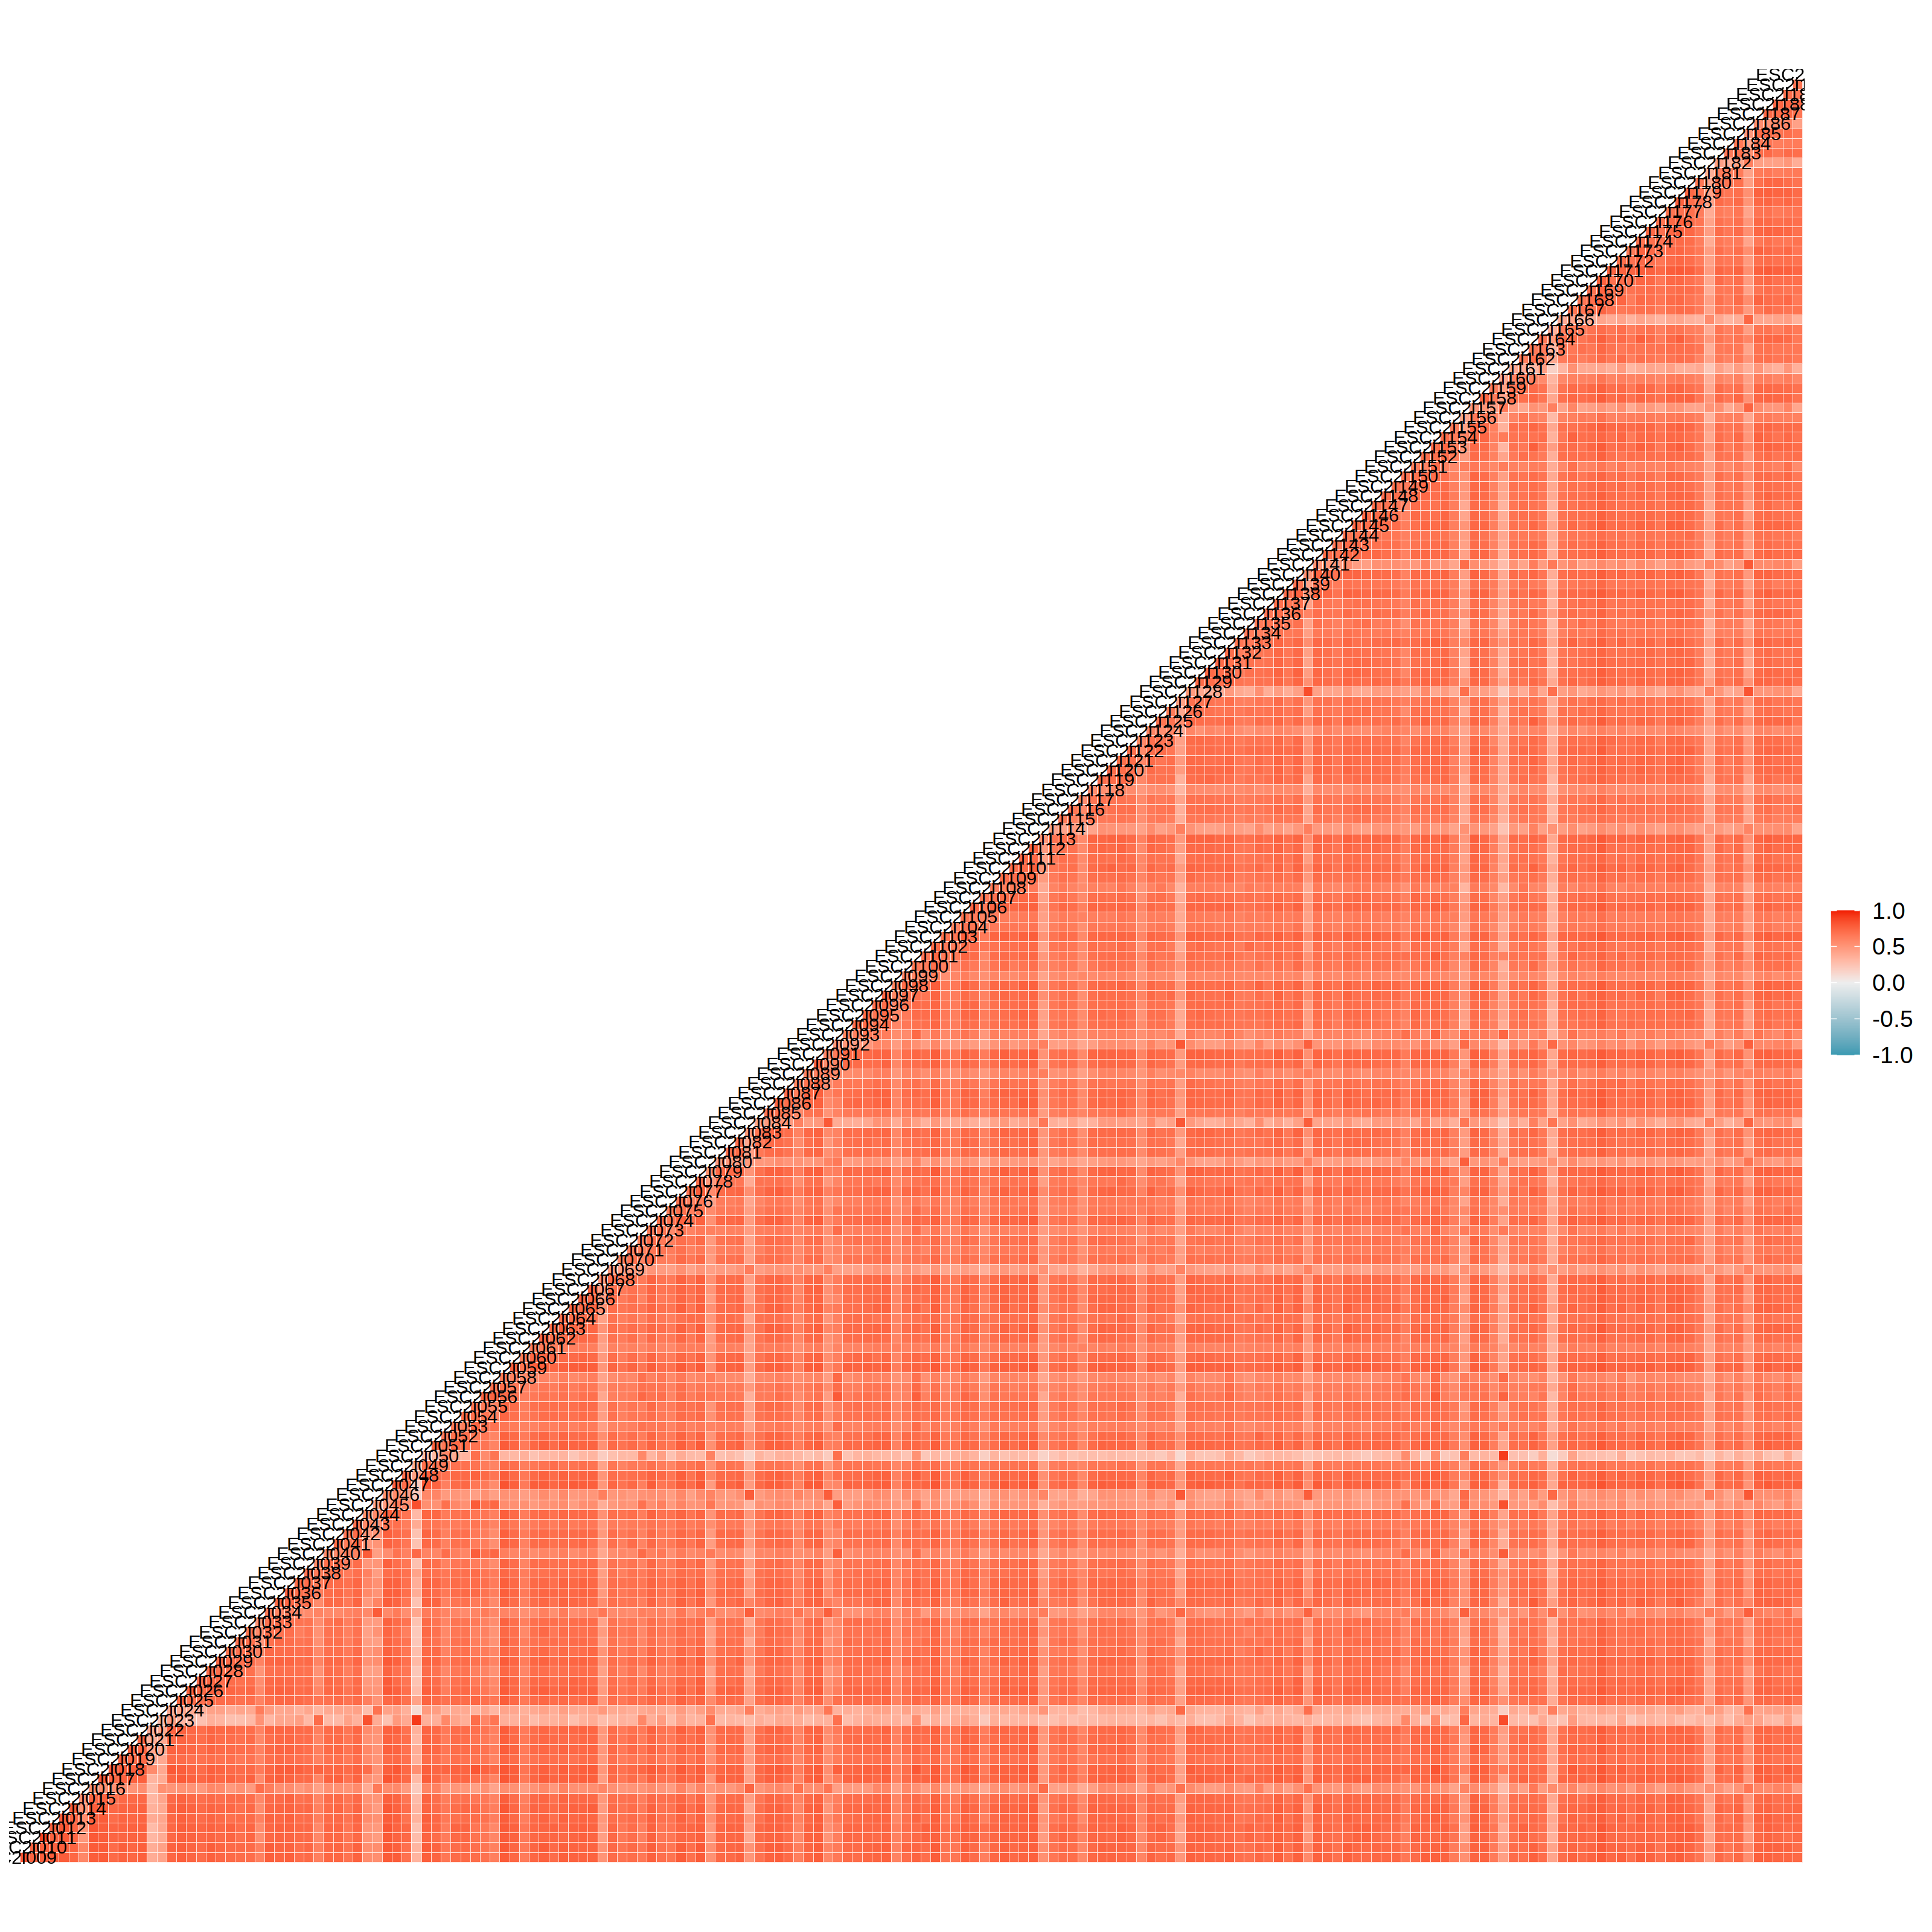

In [26]:
options(repr.plot.width = 16, repr.plot.height = 16, repr.plot.res = 200)
ggcorr(RNAres,legend.size=14,method = c("everything","pearson"),label=F,label_round=3) 